experiment 1: Getting introduced to data analytics libraries in Python

In [15]:
%pip install pandas seaborn matplotlib scikit-learn numpy statsmodelspip 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns





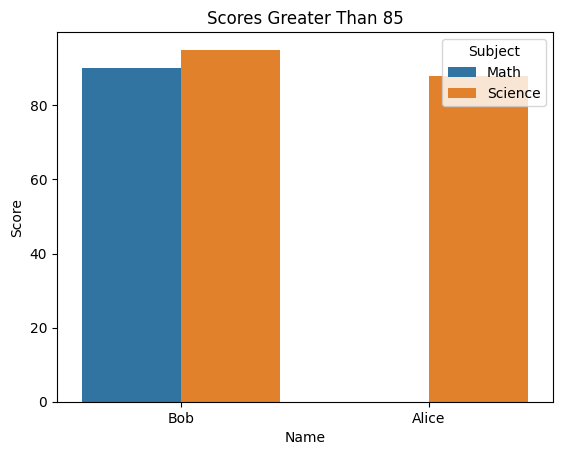

In [3]:
# Sample data
data = pd.DataFrame({
'Name': ['Alice', 'Bob'],
'Math': [85, 90],
'Science': [88, 95]
})
# Tidy, filter, and plot
tidy_data = data.melt(id_vars='Name', var_name='Subject', value_name='Score')
filtered = tidy_data[tidy_data['Score'] > 85]
# Plot
sns.barplot(data=filtered, x='Name', y='Score', hue='Subject')
plt.title('Scores Greater Than 85')
plt.show()

experiment 2:Simple Linear Regression in Python

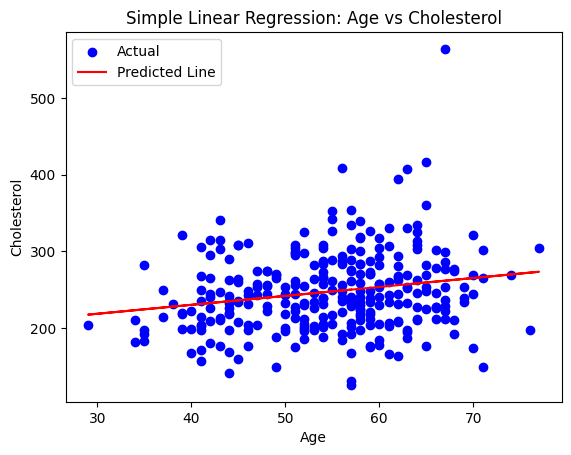

R²: 0.04106440667329392
RMSE: 2583.991058355603


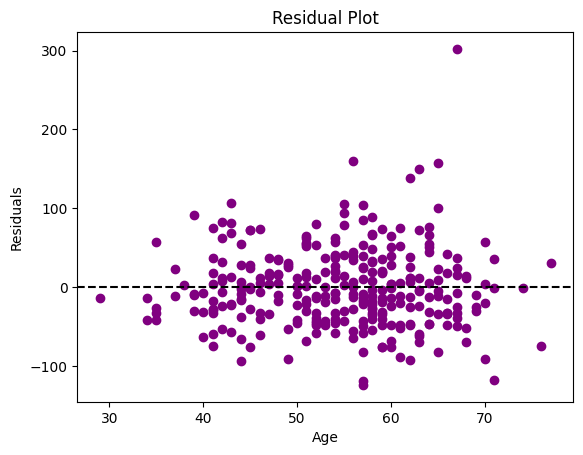

In [10]:
# Load the CSV
data = pd.read_csv('Heart.csv')

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Independent and dependent variables
X = data[['Age']]
y = data['Chol']

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot actual vs predicted
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Simple Linear Regression: Age vs Cholesterol')
plt.legend()
plt.show()

# R² and RMSE
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred )
print("R²:", r2)
print("RMSE:", rmse)

# Residuals
residuals = y - y_pred

# Residual Plot
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

experiment 3: Multiple Regression in Python

In [32]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load your custom dataset
# Assuming the dataset is in CSV format
# Replace 'your_dataset.csv' with your actual dataset file path
data = pd.read_csv('Heart.csv')

# Step 3: Prepare the features (X) and target (y)
# Let's assume your target variable is the last column in your dataset
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values   # Last column as the target variable

# Step 4: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Optionally scale the features (standardization)
# Scaling is important when features have different units and magnitudes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Initialize the model
model = LinearRegression()

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Step 10: Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 11: Optional - Print the model coefficients (for interpretation)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

ValueError: could not convert string to float: 'nontypical'

experiment 8: Visualization in python using Matplotlib Library.

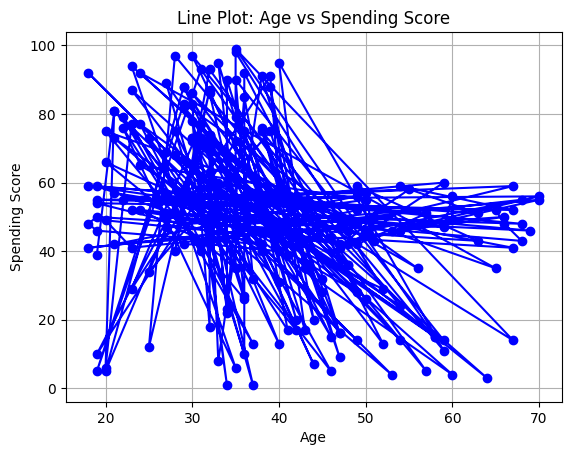

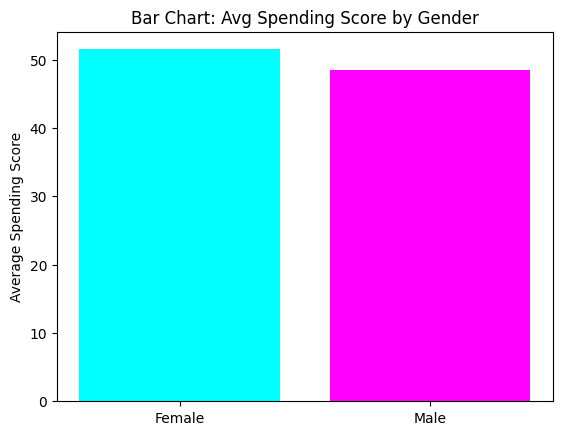

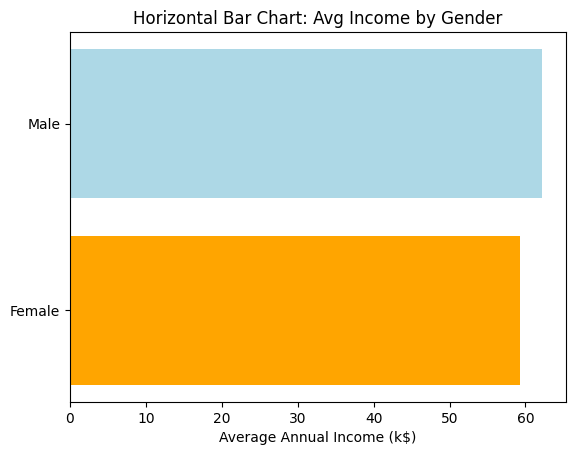

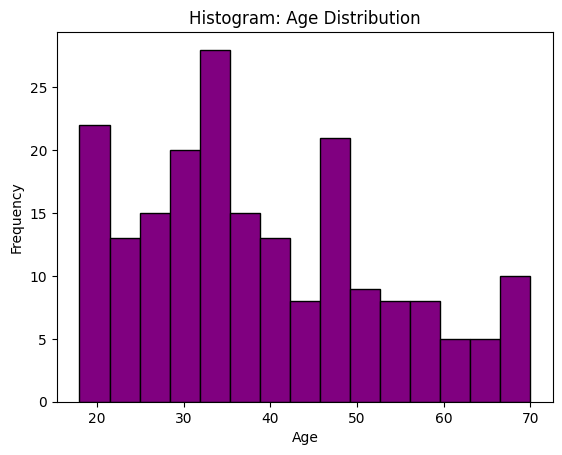

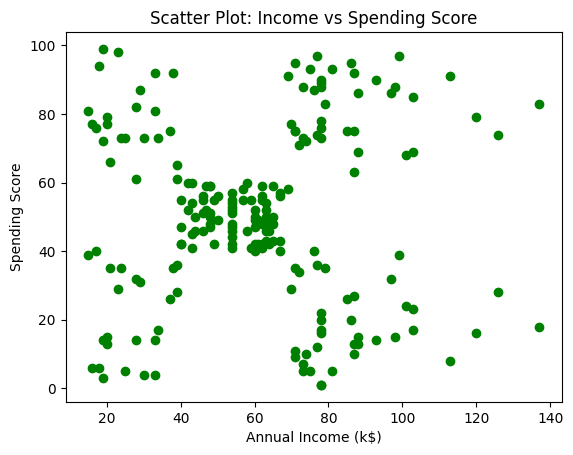

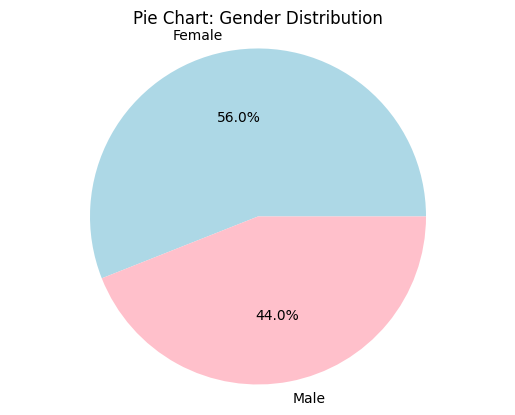

/var/folders/y_/qn9h7yrj6kl27mx58t12h77m0000gn/T/ipykernel_10501/427666748.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_scores, female_scores], labels=['Male', 'Female'])


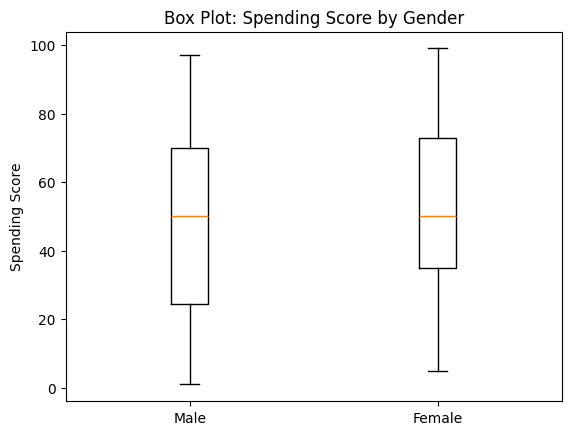

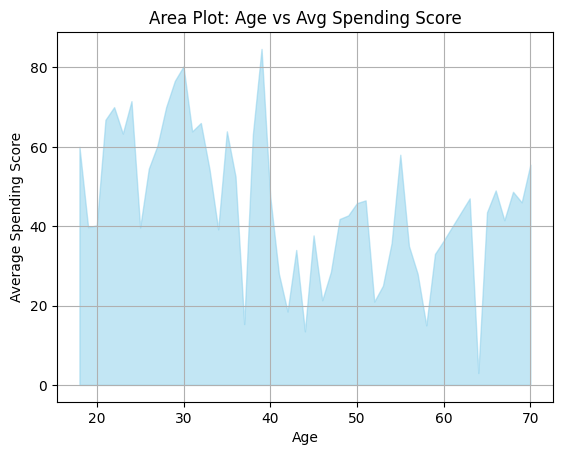

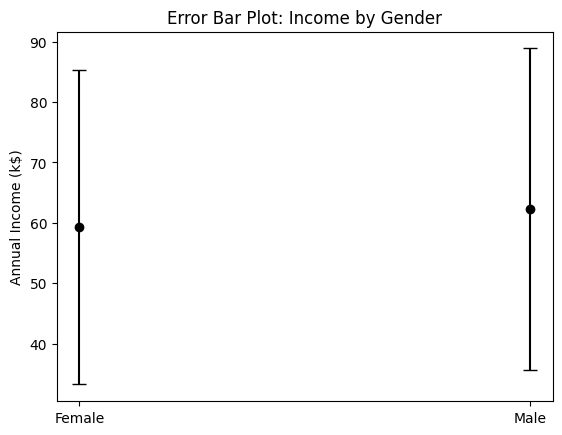

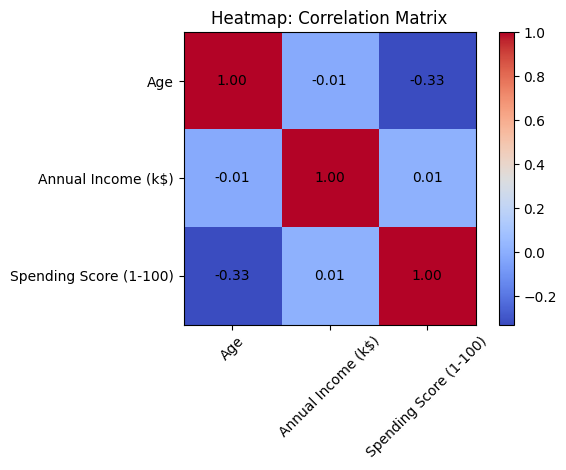

In [23]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# 1. Line Plot - Age vs Spending Score
plt.figure()
plt.plot(df['Age'], df['Spending Score (1-100)'], marker='o', linestyle='-', color='blue')
plt.title("Line Plot: Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

# 2. Bar Chart - Average Spending Score by Gender
avg_spending = df.groupby('Genre')['Spending Score (1-100)'].mean()
plt.figure()
plt.bar(avg_spending.index, avg_spending.values, color=['cyan', 'magenta'])
plt.title("Bar Chart: Avg Spending Score by Gender")
plt.ylabel("Average Spending Score")
plt.show()

# 3. Horizontal Bar Chart - Average Income by Gender
avg_income = df.groupby('Genre')['Annual Income (k$)'].mean()
plt.figure()
plt.barh(avg_income.index, avg_income.values, color=['orange', 'lightblue'])
plt.title("Horizontal Bar Chart: Avg Income by Gender")
plt.xlabel("Average Annual Income (k$)")
plt.show()

# 4. Histogram - Age Distribution
plt.figure()
plt.hist(df['Age'], bins=15, color='purple', edgecolor='black')
plt.title("Histogram: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 5. Scatter Plot - Income vs Spending Score
plt.figure()
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='green')
plt.title("Scatter Plot: Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

# 6. Pie Chart - Gender Distribution
gender_counts = df['Genre'].value_counts()
plt.figure()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Pie Chart: Gender Distribution")
plt.axis('equal')
plt.show()

# 7. Box Plot - Spending Score by Gender
male_scores = df[df['Genre'] == 'Male']['Spending Score (1-100)']
female_scores = df[df['Genre'] == 'Female']['Spending Score (1-100)']
plt.figure()
plt.boxplot([male_scores, female_scores], labels=['Male', 'Female'])
plt.title("Box Plot: Spending Score by Gender")
plt.ylabel("Spending Score")
plt.show()

# 8. Area Plot - Age vs Avg Spending Score
age_grouped = df.groupby('Age')['Spending Score (1-100)'].mean().reset_index()
x = age_grouped['Age'].astype(float)
y = age_grouped['Spending Score (1-100)'].astype(float)
plt.figure()
plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.title("Area Plot: Age vs Avg Spending Score")
plt.xlabel("Age")
plt.ylabel("Average Spending Score")
plt.grid(True)
plt.show()

# 9. Error Bar Plot - Income by Gender
income_mean = df.groupby('Genre')['Annual Income (k$)'].mean()
income_std = df.groupby('Genre')['Annual Income (k$)'].std()
plt.figure()
plt.errorbar(income_mean.index, income_mean.values, yerr=income_std.values, fmt='o', capsize=5, color='black')
plt.title("Error Bar Plot: Income by Gender")
plt.ylabel("Annual Income (k$)")
plt.show()

# 10. Heatmap - Correlation Matrix
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure()
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.title("Heatmap: Correlation Matrix")
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

experiment 4: Time Series Analysis in Python

/var/folders/y_/qn9h7yrj6kl27mx58t12h77m0000gn/T/ipykernel_10501/3815974636.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')


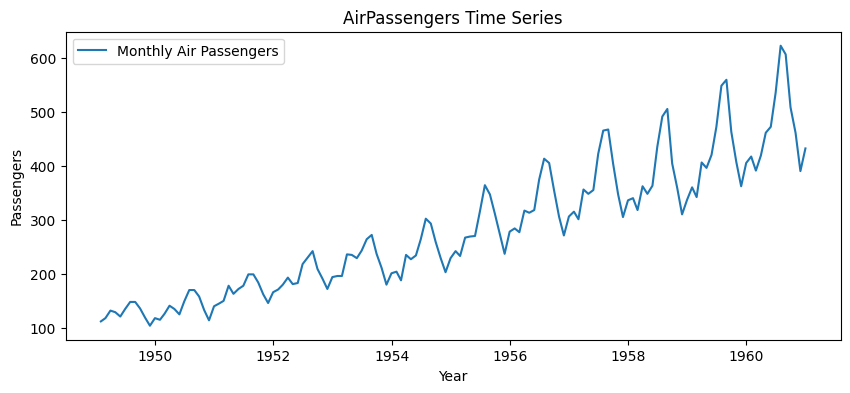

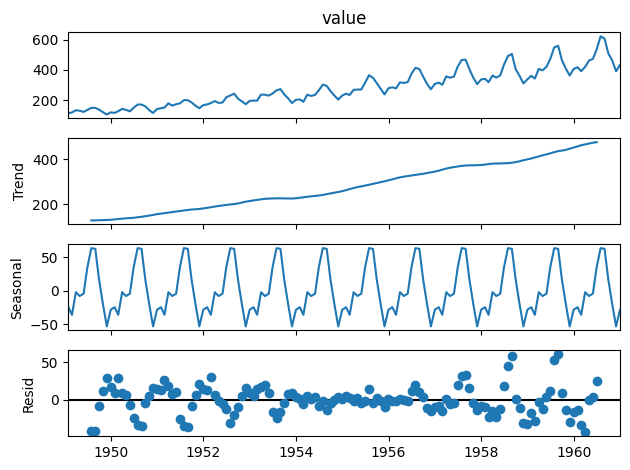

/Users/shashanksingh/Downloads/DAVEXPERIMENTS/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/shashanksingh/Downloads/DAVEXPERIMENTS/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/shashanksingh/Downloads/DAVEXPERIMENTS/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/shashanksingh/Downloads/DAVEXPERIMENTS/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 06 May 2025   AIC                           1353.347
Time:                        13:01:18   BIC                           1368.161
Sample:                    01-31-1949   HQIC                          1359.366
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.856      0.0

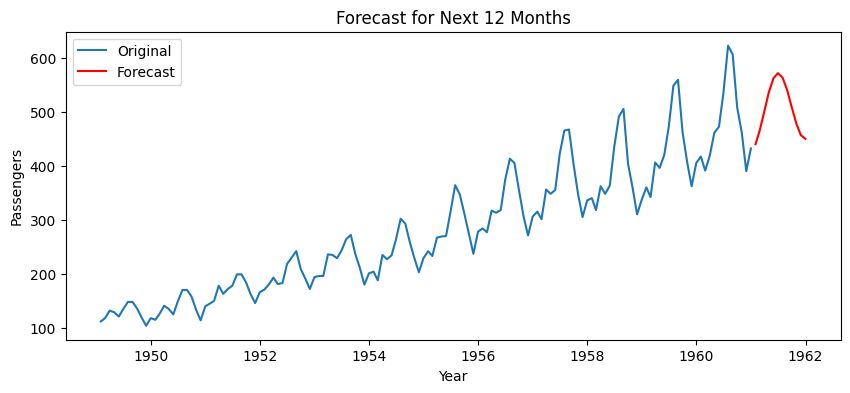

In [24]:
# Load built-in AirPassengers dataset
data = sm.datasets.get_rdataset("AirPassengers").data

# Convert to time series
data['Month'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)
ts = data['value']

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Monthly Air Passengers')
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Decompose the series (Additive)
decomposition = seasonal_decompose(ts, model='additive')
decomposition.plot()
plt.show()

# Fit ARIMA model
model = ARIMA(ts, order=(2, 1, 2))  # (p,d,q) order, chosen arbitrarily here
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=12)
print("Forecasted next 12 months:\n", forecast)

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(pd.date_range(start=ts.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Forecast for Next 12 Months')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

experiment 6: Text analytics: Implementation of Spam filter/Sentiment analysis in python

In [ ]:
# 📦 Install dependencies if not already installed
# pip install textblob scikit-learn pandas nltk
# python -m textblob.download_corpora

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
import nltk

# Optional: download nltk data
nltk.download('punkt')

# ----------------------------------------
# 📌 PART 1: SPAM FILTER USING YOUR DATASET
# ----------------------------------------

# 🔄 Load your spam dataset (change the file name and column names if needed)
spam_df = pd.read_csv('your_spam_dataset.csv')  # <-- replace with your filename
spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})  # Adjust if your labels are different

# Split and vectorize
X_train, X_test, y_train, y_test = train_test_split(spam_df['message'], spam_df['label'], test_size=0.3, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train and evaluate
spam_model = MultinomialNB()
spam_model.fit(X_train_vec, y_train)
y_pred = spam_model.predict(X_test_vec)

print("📊 Spam Filter Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ----------------------------------------
# 📌 PART 2: SENTIMENT ANALYSIS ON YOUR REVIEWS
# ----------------------------------------

# 🔄 Load your review dataset (change filename and column name if needed)
review_df = pd.read_csv('your_sentiment_dataset.csv')  # <-- replace with your filename

print("\n🧠 Sentiment Analysis Results:")
for review in review_df['review']:  # <-- adjust column name as needed
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"Text: \"{review}\"")
    print(f"Sentiment: {sentiment} (Polarity: {polarity:.2f})\n")

same exp different code with custom dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2)

# Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

# Sample usage
text = "I love this product, it's amazing!"
print("Sentiment:", get_sentiment(text))


import nltk
from nltk.corpus import movie_reviews
from textblob import TextBlob
import random

# Download required corpora
nltk.download('movie_reviews')
nltk.download('punkt')  # Required for tokenization by TextBlob

# Load and shuffle dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

# Evaluate sentiment
correct = 0
total = len(documents)

for review, actual_label in documents:
    # Get sentiment polarity from TextBlob
    polarity = TextBlob(review).sentiment.polarity

    # Classify sentiment based on polarity
    predicted_label = 'pos' if polarity > 0 else 'neg'

    # Check prediction
    if predicted_label == actual_label:
        correct += 1

# Print accuracy
accuracy = correct / total * 100
print(f"TextBlob Sentiment Accuracy on NLTK movie_reviews: {accuracy:.2f}%")

experinnt 5: ARIMA

In [ ]:
# arima_forecasting.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# === Load Your Custom Dataset ===
# Replace 'your_dataset.csv' and 'Date', 'Sales' with your actual file and columns
df = pd.read_csv("your_dataset.csv", parse_dates=['Date'], index_col='Date')

# === Check & Clean Data ===
df = df.sort_index()  # Ensure datetime order
df = df.dropna()
ts = df['Sales']  # Replace with your time series column

# === Plot Original Time Series ===
plt.figure(figsize=(10, 4))
ts.plot(title='Original Time Series')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# === Check Stationarity (ADF Test) ===
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("⚠️ Data may not be stationary. Consider differencing or transformation.")

# === Plot ACF & PACF (Optional for Manual Order Selection) ===
plot_acf(ts, lags=20)
plot_pacf(ts, lags=20)
plt.show()

# === Fit ARIMA Model ===
# You can tune the (p, d, q) order based on ACF/PACF or try (1,1,1) as default
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# === Forecast Next 10 Periods ===
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthEnd(1), periods=10, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# === Plot Forecast ===
plt.figure(figsize=(10, 4))
ts.plot(label='Actual')
forecast_series.plot(label='Forecast', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("ARIMA Forecast")
plt.legend()
plt.tight_layout()
plt.show()

R CODESSS

exp 5: ARIMA

In [ ]:
# Step 1: Load the necessary libraries
install.packages("forecast")  # Run this only once if you don't have the package installed
library(forecast)

# Step 2: Load your time series data
# For demonstration, we'll use a built-in dataset 'AirPassengers' which is monthly airline passenger counts.
# Replace this with your own dataset, e.g., your data might be a CSV file.

data <- AirPassengers  # Replace this with your own dataset
print(data)

# Step 3: Visualize the time series data
plot(data, main="Airline Passengers over Time", ylab="Number of Passengers", xlab="Year")

# Step 4: Check if the data needs differencing (stationarity check)
# ARIMA models require the data to be stationary, so we may need to differ the series if it's non-stationary.

# Perform a Dickey-Fuller test to check for stationarity
adf.test(data)  # Null hypothesis: data is non-stationary (p-value < 0.05 means stationary)

# Step 5: Fit an ARIMA model
# Here, we use auto.arima to automatically determine the optimal (p, d, q) values.
# The `auto.arima()` function selects the best ARIMA model based on AICc, BIC, etc.

model <- auto.arima(data)
summary(model)

# Step 6: Evaluate the model
# You can check the residuals of the model to ensure no patterns are left unexplained.
checkresiduals(model)

# Step 7: Forecasting
# Now, forecast the next 12 months (for example) from the model:
forecasted_values <- forecast(model, h=12)  # Forecast the next 12 periods (e.g., months)
print(forecasted_values)

# Plot the forecast
plot(forecasted_values, main="Forecasted Airline Passengers", ylab="Number of Passengers", xlab="Year")

# Step 8: Get forecast values and prediction intervals
forecasted_values$mean  # Forecasted values
forecasted_values$lower  # Lower bound of the prediction interval
forecasted_values$upper  # Upper bound of the prediction interval

exp 4 : time series

In [ ]:
# Load necessary libraries
install.packages("forecast")  # Uncomment if you don't have it installed
install.packages("tseries")   # Uncomment if you don't have it installed
install.packages("ggplot2")   # For better visualization

library(forecast)
library(tseries)
library(ggplot2)

# 1. Load the time series data (Airline Passengers Data as an example)
data_ts <- AirPassengers  # Replace this with your own dataset

# Visualize the time series data
plot(data_ts, main="Airline Passengers over Time", ylab="Number of Passengers", xlab="Year")

# 2. Stationarity Check (ADF Test)
adf_result <- adf.test(data_ts)
print(adf_result)

# Interpretation of ADF Test result:
if (adf_result$p.value < 0.05) {
  print("The series is stationary.")
} else {
  print("The series is non-stationary. Differencing required.")
}

# 3. Differencing the data if it's non-stationary
if (adf_result$p.value > 0.05) {
  # Apply differencing to make the data stationary
  diff_data <- diff(data_ts)
  plot(diff_data, main="Differenced Time Series", ylab="Differenced Passengers")
  
  # Check stationarity again after differencing
  adf_result_diff <- adf.test(diff_data)
  print(adf_result_diff)
}

# 4. Time Series Decomposition (Trend, Seasonal, Residual)
decomposed_data <- decompose(data_ts)
plot(decomposed_data)

# 5. Fit an ARIMA model (Auto selection of p, d, q)
arima_model <- auto.arima(data_ts)
summary(arima_model)

# Check residuals of the ARIMA model
checkresiduals(arima_model)

# 6. Fit an ETS (Exponential Smoothing) model
ets_model <- ets(data_ts)
summary(ets_model)

# 7. Forecasting the next 12 periods (months in this case)
arima_forecast <- forecast(arima_model, h = 12)
ets_forecast <- forecast(ets_model, h = 12)

# Plot the forecasts from both ARIMA and ETS models
plot(arima_forecast, main="ARIMA Forecast", ylab="Number of Passengers", xlab="Time")
plot(ets_forecast, main="ETS Forecast", ylab="Number of Passengers", xlab="Time")

# 8. Evaluate model accuracy
print("ARIMA Model Accuracy:")
print(accuracy(arima_forecast))

print("ETS Model Accuracy:")
print(accuracy(ets_forecast))

# 9. Print Forecast Values and Prediction Intervals
print("ARIMA Forecasted Values:")
print(arima_forecast$mean)
print("ETS Forecasted Values:")
print(ets_forecast$mean)

print("ARIMA Lower Bound of Forecast Interval:")
print(arima_forecast$lower)

print("ETS Lower Bound of Forecast Interval:")
print(ets_forecast$lower)

print("ARIMA Upper Bound of Forecast Interval:")
print(arima_forecast$upper)

print("ETS Upper Bound of Forecast Interval:")
print(ets_forecast$upper)

# Additional visualizations with ggplot2 for better aesthetics
# ARIMA Forecast Plot using ggplot
arima_plot <- autoplot(arima_forecast) +
  ggtitle("ARIMA Forecast") +
  ylab("Number of Passengers") +
  xlab("Year")

# ETS Forecast Plot using ggplot
ets_plot <- autoplot(ets_forecast) +
  ggtitle("ETS Forecast") +
  ylab("Number of Passengers") +
  xlab("Year")

# Print plots
print(arima_plot)
print(ets_plot)